<a href="https://colab.research.google.com/github/mittajithendra/Cab-fare-prediction/blob/master/cab_fare_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CAB FARE PREDICTION***
# Problem Statement
You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected thehistorical data from your pilot project and now have a requirement to apply analytics forfare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

In [0]:
#loading the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import requests
from shapely.geometry import mapping, shape
from shapely.prepared import prep
from shapely.geometry import Point
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Load data files
data=pd.read_csv("/content/drive/My Drive/train_cab.csv")
train=pd.read_csv("/content/drive/My Drive/train_cab.csv")
test=pd.read_csv("/content/drive/My Drive/test.csv")

In [5]:
#check the number of rows and columns
print(data.shape)
print(train.shape)
print(test.shape)

(16067, 7)
(16067, 7)
(9914, 6)


In [6]:
#Displays the first 5 rows of the train dataset
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
#displays the first 5 rows of the test dataset
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
#Total number of missing values in each column
train.isna().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

# **Data Cleaning and Missing value Analysis**


In [0]:
#fare_amount is in object form convert into integer format
train['fare_amount']=pd.to_numeric(train['fare_amount'],errors="coerce")

In [11]:
#After converting fare amount into integer type one extra null value is added here.Before converting into integer
#fare_amount column has 24 null values now there are 25 null values
train.isna().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [12]:
#extra null value is due to the index location 1123 here fare amount value is 430- . so make it 430 and assign
data.iloc[1123]

fare_amount                             430-
pickup_datetime      2009-09-22 19:01:01 UTC
pickup_longitude                    -73.9796
pickup_latitude                      40.7713
dropoff_longitude                   -73.9758
dropoff_latitude                      40.782
passenger_count                            1
Name: 1123, dtype: object

In [0]:
#assign 430 to there location
train.iloc[1123,0]=430

In [14]:
train.isna().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [0]:
#pickup_datetime column is in object convert into datetime format 
train['pickup_datetime']=pd.to_datetime(train["pickup_datetime"],errors="coerce")

In [16]:
#now one null value is added in pickup_datetime column by observation
train.isna().sum()

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [17]:
#finding the row which has null value in pickup_datetime
train[train['pickup_datetime'].isna()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1327,11.5,NaT,-73.981947,40.7282,-73.988582,40.759202,1.0


In [18]:
#Here null value is due to here pickup_datetime value is 43 whcich doesnot represent datetime
data.iloc[1327]

fare_amount             11.5
pickup_datetime           43
pickup_longitude    -73.9819
pickup_latitude      40.7282
dropoff_longitude   -73.9886
dropoff_latitude     40.7592
passenger_count            1
Name: 1327, dtype: object

In [0]:
#so make a null value
data.iloc[1327,1]=np.nan

In [20]:
train.isna().sum()

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [0]:
# Delete all rows which contain null values
train=train.dropna(subset=["pickup_datetime","fare_amount","passenger_count"])

In [22]:
#data types of each column
train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [23]:
#Now there is no null value
train.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [24]:
test.isna().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [25]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [0]:
#Now we need to convert the datatypes of test dataset similar to train dataset
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"],errors="coerce")

In [27]:
#In general every cab allows the passenger count is max 6
len(train[train["passenger_count"]>6])

19

In [28]:
#checking the records having passenger count>6
train[train["passenger_count"]>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33+00:00,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00+00:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05+00:00,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05+00:00,-73.960853,40.761557,-73.976335,40.748361,354.0
971,10.1,2010-11-21 01:41:00+00:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00+00:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29+00:00,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50+00:00,-73.988977,40.721068,-73.982368,40.732064,345.0
1146,8.0,2014-03-27 08:05:01+00:00,-73.991098,40.770655,-73.976933,40.790070,5345.0


In [0]:
#Remove the records which have passenger count >6
train=train.drop(train[train["passenger_count"]>6].index,axis=0)

In [30]:
#passenger count should be greater that 1. Less than 1 is not possible
len(train[train["passenger_count"]<1])

58

In [0]:
#Remove the records passengers count <1
train=train.drop(train[train["passenger_count"]<1].index,axis=0)

In [32]:
train.shape

(15910, 7)

In [33]:
#on seeing this observation maximum fare amount is too large there is sudden drop off in fare amount
train.fare_amount.sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1123       430.00
           ...   
2780         0.01
10002        0.00
2486        -2.50
2039        -2.90
13032       -3.00
Name: fare_amount, Length: 15910, dtype: float64

In [0]:
#Drop the records having fare_amount > 454
train=train.drop(train[train["fare_amount"]>454].index,axis=0)

In [35]:
len(train[train["fare_amount"]<=0])

4

In [0]:
#Fare_amount should not be <0 . So remove the records if it has values <0
train=train.drop(train[train["fare_amount"]<=0].index,axis=0)

In [37]:
train.shape

(15904, 7)

In [38]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

We know that Latitudes are range in between -90 to 90
and Longitudes are range between -180 to 180. In our dataset if there are any records not between those remove that records

In [0]:
#Remove the records which are not in actual ranges
train=train.drop(train[train["pickup_longitude"]<-180].index,axis=0)
train=train.drop(train[train["pickup_latitude"]<-90].index,axis=0)
train=train.drop(train[train["dropoff_longitude"]<-180].index,axis=0)
train=train.drop(train[train["dropoff_latitude"]<-90].index,axis=0)
train=train.drop(train[train["pickup_longitude"]>180].index,axis=0)
train=train.drop(train[train["pickup_latitude"]>90].index,axis=0)
train=train.drop(train[train["dropoff_longitude"]>180].index,axis=0)
train=train.drop(train[train["dropoff_latitude"]>90].index,axis=0)

In [40]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

# FEATURE ENGINEERING

In [0]:
#Add more columns using pickup_datetime
train["year"]=train['pickup_datetime'].dt.year
train["Month"]=train["pickup_datetime"].dt.month
train["Date"]=train["pickup_datetime"].dt.day
train["Day"]=train["pickup_datetime"].dt.dayofweek
train["Hour"]=train["pickup_datetime"].dt.hour

In [42]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000
mean,11.402472,-72.475081,39.898838,-72.465338,39.899372,1.649645,2011.730743,6.265044,15.669308,3.034207,13.494749
std,11.312762,10.538127,6.186416,10.566052,6.186041,1.265811,1.866926,3.447121,8.685298,1.968648,6.521605
min,0.010000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992143,40.734946,-73.991181,40.734715,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981689,40.752640,-73.980157,40.753565,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.966808,40.767382,-73.963643,40.768027,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [0]:
#similarly do in test set
test["year"]=test['pickup_datetime'].dt.year
test["Month"]=test["pickup_datetime"].dt.month
test["Date"]=test["pickup_datetime"].dt.day
test["Day"]=test["pickup_datetime"].dt.dayofweek
test["Hour"]=test["pickup_datetime"].dt.hour

In [44]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [0]:
# From latitudes and longitudes we can know the distance i.e how long the passenger travel which
#is useful for finding fare amount. This distance method calculats the distance between two latitudes and longitudes
def distance(values):
  longitude_s=values[0]
  latitude_s=values[1]
  longitude_e=values[2]
  latitude_e=values[3]
  start=(latitude_s,longitude_s)
  end=(latitude_e,longitude_e)
  return geodesic(start, end).miles*1.6

In [0]:
#using the pickup and drop latitudes and longitudes calculates the distances and store into new column Distance
train["Distance"]=train[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']].apply(distance,axis=1)

In [47]:
train.Distance.sort_values(ascending=False)[0:50]

9147     8617.557602
8647     8617.513608
2397     8617.484343
472      8617.330716
11653    8616.709306
13340    8616.642166
10215    8616.602348
4597     8616.583388
10458    8615.990794
10672    8615.722287
10488    8615.576734
1260     8615.289370
4278     8615.243659
6188     8614.203168
12983    8614.153749
6302     8613.050255
12705    8611.397601
14197    8607.172758
15783    8606.753327
15749    6009.145985
2280     6006.721975
5864     5403.220089
7014     4403.443725
10710     129.013953
14536     128.626836
11619     126.590280
12228     122.670258
5663      100.578640
1684       99.265543
3075       97.485133
9899       97.173372
4487       95.363602
9808       93.452161
7401       92.120777
12349      43.340218
649        39.240659
6308       37.688470
4118       32.384864
7021       29.272726
6677       26.204354
4567       25.552315
8105       24.537341
15023      24.042372
15178      23.676781
14099      23.565574
12433      23.382830
4268       23.070481
3216       23

In [0]:
#In distance there is sudden drop after 130 so remove those columns which are too large
train=train.drop(train[train["Distance"]>130].index,axis=0)

In [0]:
#Distance ==0 means they didnt travel. so remove those records 
train=train.drop(train[train["Distance"]==0].index,axis=0)

In [50]:
train.shape

(15426, 13)

In [0]:
#Convert data types into required format
train["passenger_count"]=train["passenger_count"].astype('int64')
train["year"]=train["year"].astype('int64')
train["Month"]=train["Month"].astype('int64')
train["Date"]=train["Date"].astype('int64')
train["Day"]=train["Day"].astype('int64')
train["Hour"]=train["Hour"].astype('int64')

In [52]:
train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
Month                              int64
Date                               int64
Day                                int64
Hour                               int64
Distance                         float64
dtype: object

In [0]:
# Also calculates the distance in test dataset using pickup oand drop off location
test["Distance"]=test[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']].apply(distance,axis=1)

In [54]:
test["Distance"].describe()

count    9914.000000
mean        3.416373
std         3.952447
min         0.000000
25%         1.291724
50%         2.205209
75%         4.021880
max        99.482299
Name: Distance, dtype: float64

In [0]:
#Using this we can know the all countries borders latitudes and longitudes
data = requests.get("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson").json()

countries = {}
for feature in data["features"]:
    geom = feature["geometry"]
    country = feature["properties"]["ADMIN"]
    countries[country] = prep(shape(geom))

In [0]:
#This method helps to find country based on the latitude and longitude
def get_country(a):
  lon=a[0]
  lat=a[1]
  point = Point(lon, lat)
  for country, geom in countries.items():
    if geom.contains(point):
      return country
  return "unknown"

In [0]:
# Find the Country using latitude and longitude
train["Country"]=train[['pickup_longitude', 'pickup_latitude']].apply(get_country,axis=1)

In [58]:
train["Country"].value_counts()

United States of America    14880
unknown                       538
Antarctica                      8
Name: Country, dtype: int64

Few latitudes and Longitudes are belongs to antarctca 

In [59]:
train[train["Country"]=='unknown']

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Distance,Country
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.394418,unknown
94,9.0,2013-01-09 14:42:00+00:00,-73.946852,40.775802,-73.964340,40.760703,1,2013,1,9,2,14,2.221192,unknown
135,11.5,2012-12-21 06:47:00+00:00,-73.947472,40.771227,-73.981832,40.760272,1,2012,12,21,4,6,3.127580,unknown
163,15.3,2011-06-12 13:33:00+00:00,-73.949477,40.768018,-74.003118,40.733022,5,2011,6,12,6,13,5.933985,unknown
187,17.0,2013-06-06 15:23:56+00:00,-73.954462,40.764046,-73.994593,40.729272,2,2013,6,6,3,15,5.108223,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15932,19.3,2009-01-06 09:29:00+00:00,-74.015903,40.711410,-73.954777,40.765363,1,2009,1,6,1,9,7.863250,unknown
15978,8.9,2011-12-27 08:42:58+00:00,-73.946831,40.771804,-73.972704,40.764138,1,2011,12,27,1,8,2.330854,unknown
16002,4.5,2013-06-26 22:55:00+00:00,-74.004610,40.752242,-73.995920,40.748647,2,2013,6,26,2,22,0.830593,unknown
16024,12.5,2015-02-07 23:38:42+00:00,-73.949303,40.771721,-73.982971,40.767761,3,2015,2,7,5,23,2.859651,unknown


In [0]:
#Also find country in test dataset
test["Country"]=test[['pickup_longitude', 'pickup_latitude']].apply(get_country,axis=1)

In [61]:
test["Country"].value_counts()

United States of America    9601
unknown                      313
Name: Country, dtype: int64

In [62]:
train["Country"].value_counts()

United States of America    14880
unknown                       538
Antarctica                      8
Name: Country, dtype: int64

In test data there is no antarctica and we know there are no paved roads in antarctica. So we can remove those records

In [0]:
train=train.drop(train[train["Country"]=="Antarctica"].index,axis=0)

In [0]:
#Remove the columns which was not used now
train=train.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],axis=1)

In [65]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,Distance,Country
0,4.5,1,2009,6,15,0,17,1.023623,United States of America
1,16.9,1,2010,1,5,1,16,8.394418,unknown
2,5.7,2,2011,8,18,3,0,1.381067,United States of America
3,7.7,1,2012,4,21,5,4,2.779557,United States of America
4,5.3,1,2010,3,9,1,7,1.986735,United States of America


In [0]:
# Remove thr columns in test data also
test=test.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],axis=1)

In [67]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,Distance,Country
0,1,2015,1,27,1,13,2.307515,United States of America
1,1,2015,1,27,1,13,2.409729,United States of America
2,1,2011,10,8,5,11,0.614593,United States of America
3,1,2012,12,1,5,21,1.948293,United States of America
4,1,2012,12,1,5,21,5.351580,United States of America


# Data Visualization
From this we know the features which affects the fare amount

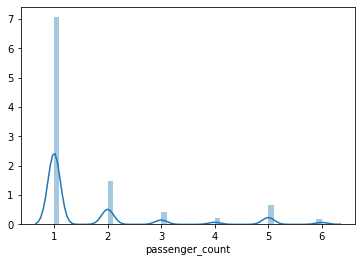

In [68]:
sns.distplot(train["passenger_count"])

Text(0, 0.5, 'Fare_amount')

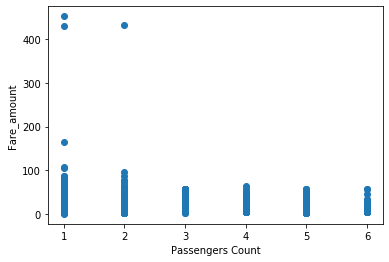

In [69]:
plt.scatter(train["passenger_count"],train["fare_amount"])
plt.xlabel("Passengers Count")
plt.ylabel("Fare_amount")

Observation:
From the above plot single and double passengers are travelled more frequently and the fare amount also high for single and double passengers

Text(0, 0.5, 'fare amount')

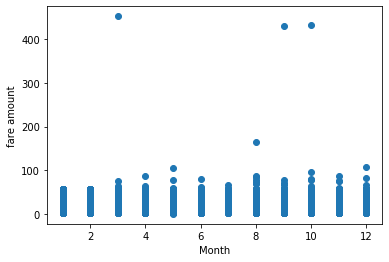

In [70]:
plt.scatter(train["Month"],train["fare_amount"])
plt.xlabel("Month")
plt.ylabel("fare amount")

The impact of fare on november is low

Text(0, 0.5, 'fare amount')

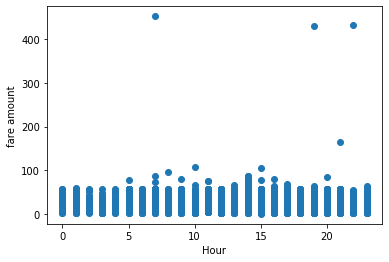

In [71]:
plt.scatter(train["Hour"],train["fare_amount"])
plt.xlabel("Hour")
plt.ylabel("fare amount")

Impact of fare on 7am and 14pm is high

Text(0, 0.5, 'Fare amount')

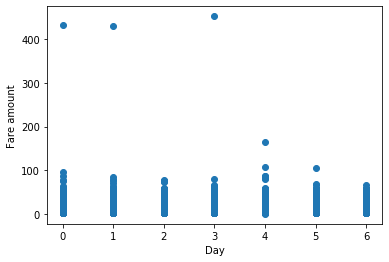

In [72]:
plt.scatter(train["Day"],train["fare_amount"])
plt.xlabel("Day")
plt.ylabel("Fare amount")

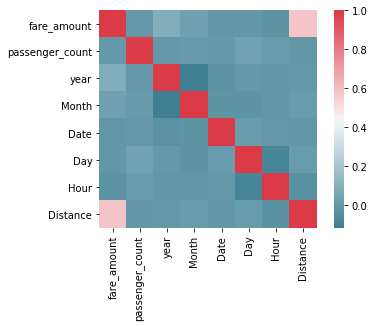

In [73]:
corr=train.corr()
f,ax=plt.subplots()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

# Feature Scaling

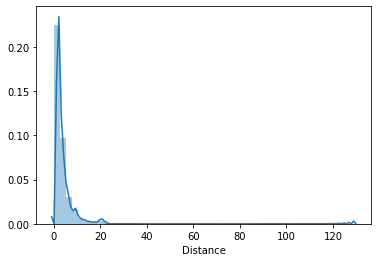

In [74]:
sns.distplot(train["Distance"])

Due to skewness is high apply log transform

In [0]:
train['Distance'] = np.log1p(train['Distance'])

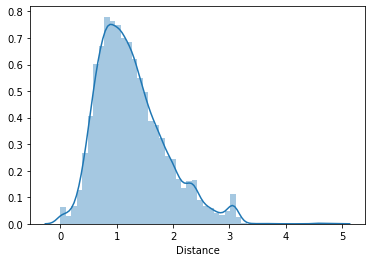

In [76]:
sns.distplot(train["Distance"])

In [0]:
test['Distance'] = np.log1p(test['Distance'])

# Apply ML Algorithms

In [0]:
X=train.iloc[:,1:-1]
Y=train.iloc[:,0]

In [79]:
X.head()

,passenger_count,year,Month,Date,Day,Hour,Distance
0,1,2009,6,15,0,17,0.704889
1,1,2010,1,5,1,16,2.240116
2,2,2011,8,18,3,0,0.867549
3,1,2012,4,21,5,4,1.329607
4,1,2010,3,9,1,7,1.094181


In [80]:
Y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [0]:
#split the date in training set and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=234)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12334, 7)
(3084, 7)
(12334,)
(3084,)


# Linear Regression

In [83]:
#Apply linear regression model on the training data
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#prdict the test data on the developed model
Y_pred=lr.predict(X_test)

In [0]:
#This model is designed to find accuracy
def accuracy(Y_pred,Y):
  x=np.sqrt(mean_squared_error(Y_pred, Y))
  return x

In [86]:
# RMS error of the model is
print("Root mean squared error for training data    "+str(accuracy(lr.predict(X_train),Y_train)))
print("Root mean squared error for test data    "+str(accuracy(Y_pred,Y_test)))

Root mean squared error for training data    8.88827981460319
Root mean squared error for test data    5.926356077490776


# Decision Tree

In [87]:
#Apply decision tree for the training data
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [88]:
#Calculate RMSE of the model

print("Root mean squared error for training data    "+str(accuracy(DTR.predict(X_train),Y_train)))
print("Root mean squared error for test data    "+str(accuracy(DTR.predict(X_test),Y_test)))


Root mean squared error for training data    6.586810352697224e-16
Root mean squared error for test data    6.010035112150897


# KNN

In [0]:
#Develop KNN for the training data
neigh = KNeighborsRegressor()

In [90]:
#For Knn model find the best value for n_neighbors using grid search
clf=GridSearchCV(neigh,{'n_neighbors':np.arange(2,30)})
clf.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
#print best value for n_neighbors
print(clf.best_params_)

{'n_neighbors': 18}


In [92]:
neigh = KNeighborsRegressor(n_neighbors=23)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                    weights='uniform')

In [93]:
print("Root mean squared error for training data    "+str(accuracy(neigh.predict(X_train),Y_train)))
print("Root mean squared error for test data    "+str(accuracy(neigh.predict(X_test),Y_test)))

Root mean squared error for training data    10.505428972960413
Root mean squared error for test data    8.763256589457352


# Random Forest Regressor

In [0]:
#Apply Random Forest model on the training data 
rf = RandomForestRegressor(random_state=0)

In [95]:
#Find the best values for n_estimators and mox_depth using grid search cros-validation
clf=GridSearchCV(rf,{'n_estimators':[70,80,90,100,110,120,130],'max_depth':[2,4,6,8,10]})
clf.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [96]:
#print best parameters
print(clf.best_params_)

{'max_depth': 4, 'n_estimators': 100}


In [97]:
# Develop the model with best parameters obtained
rf = RandomForestRegressor(n_estimators=80,max_depth=4,random_state=0)
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [98]:
#RMSE of the random forest mode
print("Root mean squared error for training data    "+str(accuracy(rf.predict(X_train),Y_train)))
print("Root mean squared error for test data    "+str(accuracy(rf.predict(X_test),Y_test)))

Root mean squared error for training data    7.598396803505752
Root mean squared error for test data    4.589958981203051


In [99]:
print(rf.predict(X_train)[:5])
print(Y_train.iloc[:5])
print(train.iloc[8882])

[ 9.55835537  6.25232098 23.45904659  8.59005673  6.23520693]
9766      7.0
284       4.9
12610    21.7
940       7.7
3506      4.1
Name: fare_amount, dtype: float64
fare_amount                             3.5
passenger_count                           1
year                                   2013
Month                                    12
Date                                     25
Day                                       2
Hour                                     17
Distance                           0.360448
Country            United States of America
Name: 9296, dtype: object


# Predict of fare from given test dataset

In [0]:
test_main=test.iloc[:,0:-1]

In [101]:
test_main.head()

,passenger_count,year,Month,Date,Day,Hour,Distance
0,1,2015,1,27,1,13,1.196197
1,1,2015,1,27,1,13,1.226633
2,1,2011,10,8,5,11,0.479083
3,1,2012,12,1,5,21,1.081226
4,1,2012,12,1,5,21,1.848704


We apply random forest for the final model because it has low error compare to linear regression, Decision Trees,KNN regressor

In [0]:
#predict values for final dataset
rf = RandomForestRegressor(random_state=0)
clf=GridSearchCV(rf,{'n_estimators':[70,80,90,100,110,120],'max_depth':[2,4,6,8,10]})
clf.fit(X_train,Y_train)
clf.best_params_
rf = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'],random_state=0)
rf.fit(X_train,Y_train)
final_predict=rf.predict(test_main)

In [0]:
test['fare_amount']=final_predict

In [104]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,Distance,Country,fare_amount
0,1,2015,1,27,1,13,1.196197,United States of America,9.042109
1,1,2015,1,27,1,13,1.226633,United States of America,9.129985
2,1,2011,10,8,5,11,0.479083,United States of America,6.248759
3,1,2012,12,1,5,21,1.081226,United States of America,9.042298
4,1,2012,12,1,5,21,1.848704,United States of America,14.581767


In [0]:
test.to_csv("test.csv",index=False)

In [0]:
fg=pd.read_csv("/content/test.csv")

In [107]:
fg.head()

,passenger_count,year,Month,Date,Day,Hour,Distance,Country,fare_amount
0,1,2015,1,27,1,13,1.196197,United States of America,9.042109
1,1,2015,1,27,1,13,1.226633,United States of America,9.129985
2,1,2011,10,8,5,11,0.479083,United States of America,6.248759
3,1,2012,12,1,5,21,1.081226,United States of America,9.042298
4,1,2012,12,1,5,21,1.848704,United States of America,14.581767
